In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Categories array
categories = [ # each category represent the ML-answer from as many separate models
                'is_blurry',
                'has_identified_objects',
                'contains_common_identified_objects',
                'contains_text',
                'has_exif_data',
                'is_created_at_time_near_neighbor_file',
                'is_created_geographically_close_to_neighbor_file',
                'seems_like_screenshot',
                'seems_very_dark',
                'seems_very_light',
            ]

In [3]:
# Create representation of image files
random_array = np.random.random(size=(10000, 10))
print(random_array)

[[0.04579848 0.12239048 0.36434068 ... 0.6686866  0.35346829 0.07544507]
 [0.5947305  0.45509017 0.52679154 ... 0.28350366 0.87365499 0.80122719]
 [0.919684   0.40323375 0.25454853 ... 0.02096073 0.56840596 0.8168616 ]
 ...
 [0.0186498  0.79199907 0.91663278 ... 0.54532074 0.7396726  0.39054819]
 [0.4800023  0.66763854 0.05537636 ... 0.47133828 0.36840991 0.16743364]
 [0.87375913 0.31678312 0.04213865 ... 0.92070838 0.13329022 0.63961024]]


In [4]:
# create an answer array (y)
y = np.ndarray((10000,))
# print(y)

# y(keep=0) == file.delete()

# and random_array[index][2] == 1 and random_array[index][3] < 0.3

for index, answer in enumerate(y):
    if random_array[index][0] < 0.2:
        y[index] = 1
        # random_array[index][10] = 1
    else:
        y[index] = 0
        # random_array.append[index][10] = 0


print(y)
print(np.count_nonzero(y, axis=0))

[1. 0. 0. ... 1. 0. 0.]
2028


In [ ]:
# the Numpy way
#y = (random_array[0] < 0.2 and random_array[index][2] == 1 and random_array[index][3] < 0.3)

In [5]:
# build the dataframes
X = pd.DataFrame(random_array, columns=categories)
# print(X) -- DONE!
# SEries är endimensionell
y = pd.Series(y, dtype='int8')
print(y) #-- DONE!



0       1
1       0
2       0
3       0
4       0
       ..
9995    0
9996    1
9997    1
9998    0
9999    0
Length: 10000, dtype: int8


In [6]:
# split X and y data training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)


In [7]:
# Running my first ever logistic regression
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(y_pred)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[0 1 0 ... 0 0 1]
[[2017    1]
 [   8  474]]


Text(0.5, 427.9555555555555, 'Predicted label')

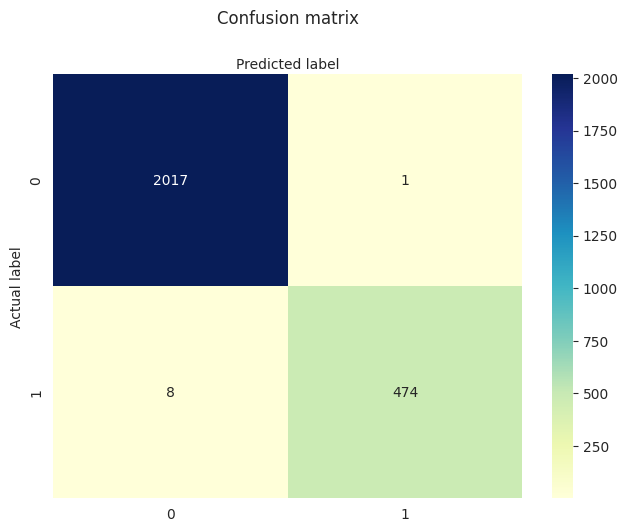

In [8]:
# prepare heatmap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# draw heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [10]:
# (m * n)(n * p)
print(np.shape(X))
print(np.shape(y))

(10000, 10)
(10000,)


In [ ]:
endimensionell = np.ndarray((10,1))

print(endimensionell)

In [11]:
grunddata = np.array([[1,1],[10,0],[4,0]])
print(np.shape(grunddata))
print(grunddata)
print(grunddata[:,1:1])
grunddata2 = np.array([[1],[1][0]])

concattat = np.concatenate((grunddata, grunddata2))

(3, 2)
[[ 1  1]
 [10  0]
 [ 4  0]]
[]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.